In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [16]:
# carDF = pd.read_excel('./data/car_mpg.xlsx', header=0)
# carDF

# xls = pd.ExcelFile('./data/car_mpg.xlsx') # DF를 리턴하는게 아니라 엑셀 파일을 리턴해준다.
# carDF = xls.parse(xls.sheet_names[0]) # parser를 통해 엑셀파일 호출 시트가 여러개가 있을 때 ! 엑셀 파일을 먼저 가져오고 시트를 불러오는 것
# carDF

carDF = pd.read_csv('./data/auto-mpg.csv', header=None)
carDF.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

In [32]:
carDF

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [34]:
carDF['origin'].value_counts() # one-hot encoding

1    249
3     79
2     70
Name: origin, dtype: int64

In [49]:
label = ['USA', 'EU', 'KOREA']

x = [ carDF[carDF['origin'] == 1]['mpg'],
      carDF[carDF['origin'] == 2]['mpg'],
      carDF[carDF['origin'] == 3]['mpg'] ]
labels

['USA', 'EU', 'KOREA']

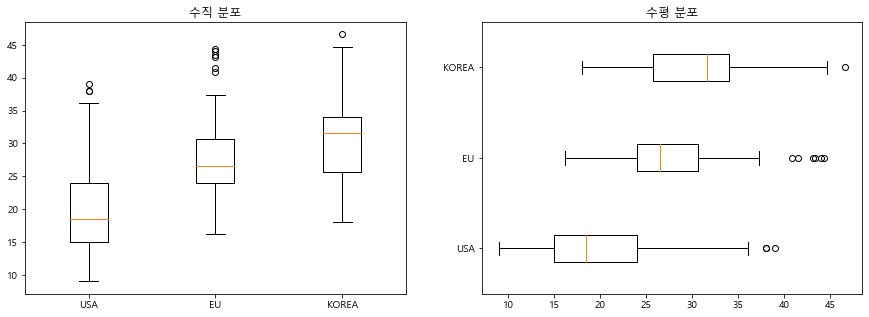

In [50]:
# 제조 국가별 연비 분포(수직, 수평)

fig = plt.figure(figsize=(15,5))
ax01 = fig.add_subplot(1,2,1)
ax02 = fig.add_subplot(1,2,2)

ax01.boxplot(x, labels = label)
ax02.boxplot(x, labels = label, vert=False)

ax01.set_title('수직 분포')
ax02.set_title('수평 분포')

plt.show()
plt.close()